In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
# from dynamic_routing_analysis import decoding_utils
from dynamic_routing_analysis import plot_utils
# import dynamic_routing_analysis as dra
import pingouin as pg

import matplotlib
import matplotlib.font_manager as fm

matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
fm.FontProperties().set_family('arial')

%load_ext autoreload
%autoreload 2
# %matplotlib inline
%matplotlib widget

In [2]:
#compare across different time bins

#load results

binsize_02_by_structure=pd.read_csv(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\CO decoding results\new_decoder_run_2025-04-04\structure_wise_decoding_accuracy.csv")
binsize_02_by_structure['bin_size'] = 0.2
binsize_02_by_structure = binsize_02_by_structure[~binsize_02_by_structure['structure'].str.contains('SCzo|SCop|SCsg|SCiw|SCig|SCdw|SCdg')]
binsize_02_by_structure = binsize_02_by_structure.query('unit_subsample_size == 20').reset_index(drop=True)
binsize_05_by_structure=pd.read_csv(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\CO decoding results\binsize testing\structure_wise_decoding_accuracy_binsize_05.csv")
binsize_15_by_structure=pd.read_csv(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\CO decoding results\binsize testing\structure_wise_decoding_accuracy_binsize_15.csv")


In [ ]:
binsize_02_by_structure

Text(0.5, 0, 'Structure')

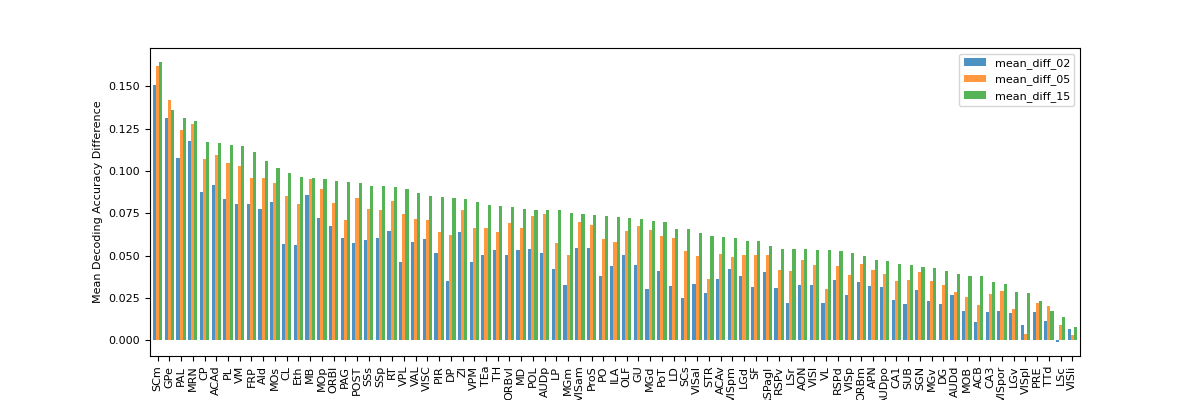

In [4]:
#merge the 3 dataframes on structure and unit_subsample_size

temp_02=binsize_02_by_structure[['structure','num_sessions']].copy()
temp_02['mean_diff_02'] = binsize_02_by_structure['mean_diff']
temp_02['sem_diff_02'] = binsize_02_by_structure['sem_diff']

temp_05=binsize_05_by_structure[['structure']].copy()
temp_05['mean_diff_05'] = binsize_05_by_structure['mean_diff']
temp_05['sem_diff_05'] = binsize_05_by_structure['sem_diff']

temp_15=binsize_15_by_structure[['structure']].copy()
temp_15['mean_diff_15'] = binsize_15_by_structure['mean_diff']
temp_15['sem_diff_15'] = binsize_15_by_structure['sem_diff']

binsize_02_05_15_by_structure = temp_02.merge(temp_05, on='structure').merge(temp_15, on='structure')

fig,ax=plt.subplots(figsize=(12,4))
binsize_02_05_15_by_structure=binsize_02_05_15_by_structure.query('num_sessions>=3').sort_values(by='mean_diff_15', ascending=False)
binsize_02_05_15_by_structure.reset_index(drop=True, inplace=True)

# errors_df=binsize_02_05_15_by_structure.copy()
# errors_df['mean_diff_02'] = binsize_02_05_15_by_structure['sem_diff_02']
# errors_df['mean_diff_05'] = binsize_02_05_15_by_structure['sem_diff_05']
# errors_df['mean_diff_15'] = binsize_02_05_15_by_structure['sem_diff_15']

binsize_02_05_15_by_structure.plot.bar(x='structure', y=['mean_diff_02', 'mean_diff_05', 'mean_diff_15'], 
                                       ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.8, width=0.8)
ax.set_ylabel('Mean Decoding Accuracy Difference')
ax.set_xlabel('Structure')

In [5]:
binsize_02_05_15_by_structure

,structure,num_sessions,mean_diff_02,sem_diff_02,mean_diff_05,sem_diff_05,mean_diff_15,sem_diff_15
0,SCm,25,0.151039,0.012763,0.161965,0.007506,0.164446,0.006344
1,GPe,5,0.131387,0.038513,0.142065,0.031600,0.136153,0.029617
2,PAL,3,0.107986,0.047162,0.124205,0.022137,0.131311,0.020570
3,MRN,20,0.117817,0.024472,0.127730,0.014605,0.129696,0.014945
4,CP,49,0.087705,0.010350,0.107202,0.006839,0.117038,0.007153
...,...,...,...,...,...,...,...,...
74,VISpl,3,0.009145,0.021615,0.003483,0.028081,0.028020,0.037429
75,PRE,3,0.016520,0.025509,0.021870,0.026934,0.023067,0.032906
76,TTd,3,0.011167,0.016466,0.020231,0.015046,0.017400,0.016492
77,LSc,5,-0.001074,0.017675,0.009207,0.011784,0.013652,0.007681


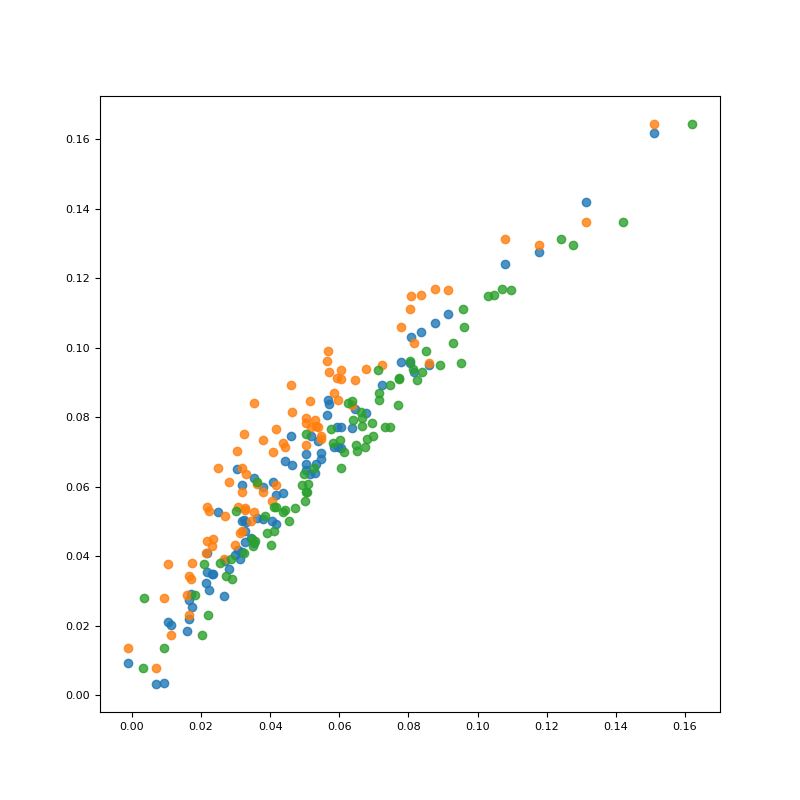

In [7]:
fig,ax=plt.subplots(figsize=(8,8))
ax.plot(binsize_02_05_15_by_structure['mean_diff_02'], binsize_02_05_15_by_structure['mean_diff_05'],
         marker='o', linestyle='None', color='#1f77b4', alpha=0.8, label='0.2s vs 0.5s')
ax.plot(binsize_02_05_15_by_structure['mean_diff_02'], binsize_02_05_15_by_structure['mean_diff_15'],
         marker='o', linestyle='None', color='#ff7f0e', alpha=0.8, label='0.2s vs 1.5s')
ax.plot(binsize_02_05_15_by_structure['mean_diff_05'], binsize_02_05_15_by_structure['mean_diff_15'],
         marker='o', linestyle='None', color='#2ca02c', alpha=0.8, label='0.5s vs 1.5s')


In [8]:
response_type_02=pd.read_parquet(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\CO decoding results\new_decoder_run_2025-04-04\response_type_predict_proba.parquet")
response_type_02=response_type_02.query('unit_subsample_size == 20').reset_index(drop=True)
response_type_02['bin_size'] = 0.2
response_type_05=pd.read_parquet(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\CO decoding results\binsize testing\response_type_predict_proba_binsize_05.parquet")
response_type_15=pd.read_parquet(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\CO decoding results\binsize testing\response_type_predict_proba_binsize_15.parquet")


In [ ]:
response_type_02

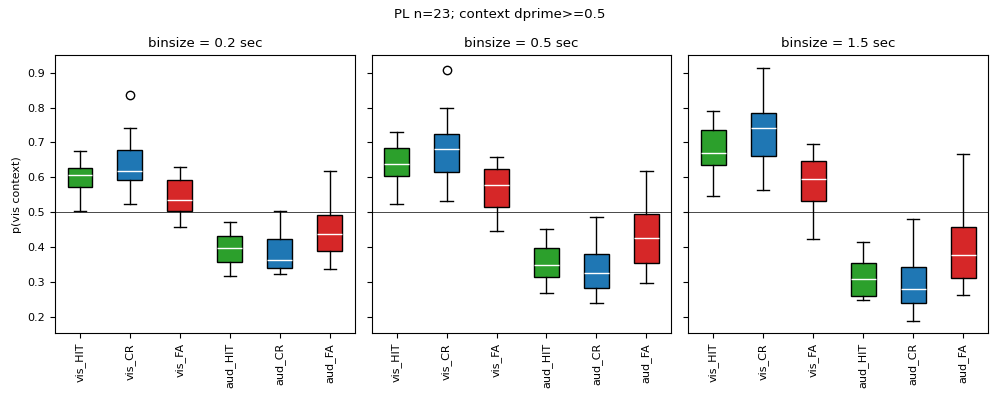

In [10]:
# single structure CR vs. FA

dprime_threshold=0.5
sel_project='DynamicRouting'
sel_unit_subsample_size=20
min_n_recs=3
use_median=False
if use_median:
    median_str='_median'
else:
    median_str=''

ss='PL'

sel_structure_02=response_type_02.query('structure==@ss and vis_context_dprime>=@dprime_threshold and aud_context_dprime>=@dprime_threshold and \
                                        unit_subsample_size==@sel_unit_subsample_size and project.str.contains(@sel_project)')

sel_structure_05=response_type_05.query('structure==@ss and vis_context_dprime>=@dprime_threshold and aud_context_dprime>=@dprime_threshold and \
                                        unit_subsample_size==@sel_unit_subsample_size and project.str.contains(@sel_project)')

sel_structure_15=response_type_15.query('structure==@ss and vis_context_dprime>=@dprime_threshold and aud_context_dprime>=@dprime_threshold and \
                                        unit_subsample_size==@sel_unit_subsample_size and project.str.contains(@sel_project)')

fig,ax=plt.subplots(1,3,figsize=(10,4),sharex=True,sharey=True)
#make boxplot of each response type
bplot=ax[0].boxplot(sel_structure_02[['vis_hit_predict_proba'+median_str,'vis_cr_predict_proba'+median_str,'vis_fa_predict_proba'+median_str,
                    'aud_hit_predict_proba'+median_str,'aud_cr_predict_proba'+median_str,'aud_fa_predict_proba'+median_str]].values,
                    positions=[0,1,2,3,4,5],patch_artist=True,medianprops={"color": "white", "linewidth": 1.0},)

ax[0].set_xticks([0,1,2,3,4,5])
ax[0].set_xticklabels(['vis_HIT','vis_CR','vis_FA','aud_HIT','aud_CR','aud_FA'],rotation=90)
fill_colors=['tab:green','tab:blue','tab:red','tab:green','tab:blue','tab:red']
# fill with colors
for patch, color in zip(bplot['boxes'], fill_colors):
    patch.set_facecolor(color)

ax[0].axhline(0.5,color='k',linewidth=0.5)
ax[0].set_title('binsize = 0.2 sec')
ax[0].set_ylabel('p(vis context)')
# ax.set_ylim([0,1])

#make boxplot of each response type
bplot=ax[1].boxplot(sel_structure_05[['vis_hit_predict_proba'+median_str,'vis_cr_predict_proba'+median_str,'vis_fa_predict_proba'+median_str,
                    'aud_hit_predict_proba'+median_str,'aud_cr_predict_proba'+median_str,'aud_fa_predict_proba'+median_str]].values,
                    positions=[0,1,2,3,4,5],patch_artist=True,medianprops={"color": "white", "linewidth": 1.0},)
ax[1].set_xticks([0,1,2,3,4,5])
ax[1].set_xticklabels(['vis_HIT','vis_CR','vis_FA','aud_HIT','aud_CR','aud_FA'],rotation=90)
fill_colors=['tab:green','tab:blue','tab:red','tab:green','tab:blue','tab:red']
# fill with colors
for patch, color in zip(bplot['boxes'], fill_colors):
    patch.set_facecolor(color)
ax[1].axhline(0.5,color='k',linewidth=0.5)
ax[1].set_title('binsize = 0.5 sec')
# ax.set_ylim([0,1])

#make boxplot of each response type
bplot=ax[2].boxplot(sel_structure_15[['vis_hit_predict_proba'+median_str,'vis_cr_predict_proba'+median_str,'vis_fa_predict_proba'+median_str,
                    'aud_hit_predict_proba'+median_str,'aud_cr_predict_proba'+median_str,'aud_fa_predict_proba'+median_str]].values,
                    positions=[0,1,2,3,4,5],patch_artist=True,medianprops={"color": "white", "linewidth": 1.0},)
ax[2].set_xticks([0,1,2,3,4,5])
ax[2].set_xticklabels(['vis_HIT','vis_CR','vis_FA','aud_HIT','aud_CR','aud_FA'],rotation=90)
fill_colors=['tab:green','tab:blue','tab:red','tab:green','tab:blue','tab:red']
# fill with colors
for patch, color in zip(bplot['boxes'], fill_colors):
    patch.set_facecolor(color)
ax[2].axhline(0.5,color='k',linewidth=0.5)
ax[2].set_title('binsize = 1.5 sec')
# ax.set_ylim([0,1])

fig.suptitle(str(ss)+' n='+str(len(sel_structure_02))+'; context dprime>='+str(dprime_threshold))
fig.tight_layout()